In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# **1.Capacitor Charging**

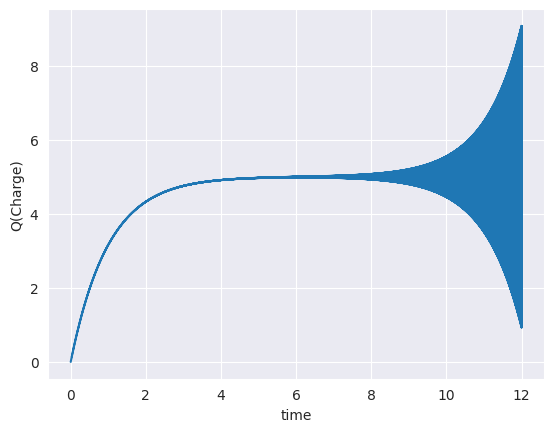

In [ ]:
'''
here i have to solve d/dt(q) = (V-q/c)/R;
using Desired algotithm: q(n+1) = q(n-1) + 2*dt*(V/R - q(n)/(RC))
i will put R=C=1, v=5 for simplicity.if we put q0=0 since for all previous times q
is also 0(in general for any negetive times is use q0 as q(-t) with this i consider
capacitor start charging from t=0 and before that its charge was const.)
we can compute q(1) = 2*dt*V/R
'''


def capacitor_charging(v=5, r=1, c=1, dt=1e-5, q0=0, t=12):
  steps = round(t / dt)
  q1 = q0 + 2*dt*(v/r - q0/(r*c))#because it involves negetive times i compute it seperatly.
  Qt = [q0, q1]
  for i in range(steps):
    Qt.append(Qt[-2] + 2*dt*(v/r - Qt[-1] / (r*c)))

  plt.plot(np.arange(len(Qt)) * dt, Qt)
  plt.xlabel('time')
  plt.ylabel('Q(Charge)')
  plt.show()

capacitor_charging()



# **2.Harmonic Oscillator**

**1.Euler's Method**

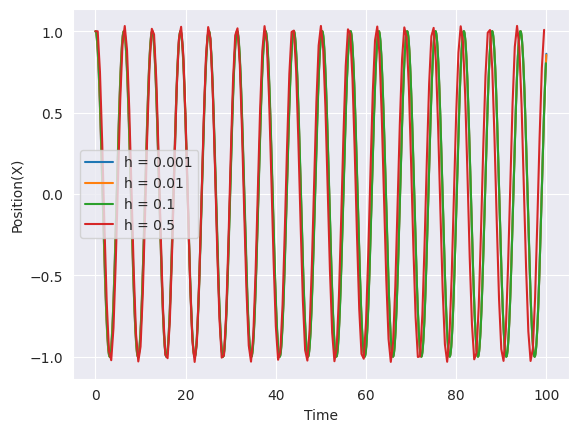

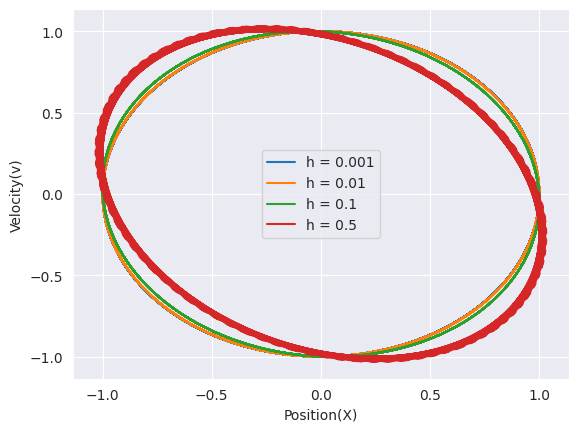

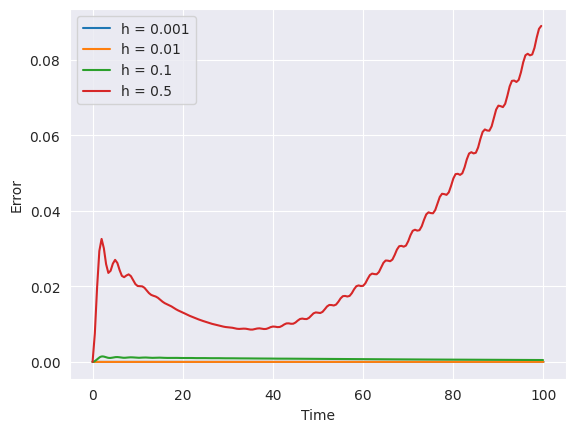

In [3]:
def Euler(w=1,x0=1,v0=0,Dt=[1e-3, 1e-2, 1e-1, 0.5],t=100):
  for dt in Dt:
    steps = round(t/dt)
    v = [v0]
    x = [x0]
    A = x0
    B = v0 / w
    Real_value = np.zeros(steps)
    Real_value[0] = x0
    for i in range(1,steps):
      x.append(x[-1] + v[-1] * dt)
      v.append(v[-1] -w**2 * x[-1] * dt )
      Real_value[i] = A * np.cos(w * i * dt) + B * np.sin(w * i* dt)

    plt.figure(1)
    plt.plot(np.arange(len(x)) * dt, x, label=f'h = {dt}')
    plt.xlabel('Time')
    plt.ylabel('Position(X)')
    plt.legend()


    plt.figure(2)
    plt.plot(v,x, label=f'h = {dt}')
    plt.xlabel('Position(X)')
    plt.ylabel('Velocity(v)')
    plt.legend()

    x = np.array(x)
    error = np.cumsum((x - Real_value)**2)
    I = np.arange(1, len(error) + 1)
    error /= I

    plt.figure(3)
    plt.plot(np.arange(len(x)) * dt, error, label=f'h = {dt}')
    plt.xlabel('Time')
    plt.ylabel('Error')
    plt.legend()


  plt.show()

  plt.show()

  plt.show()

Euler()

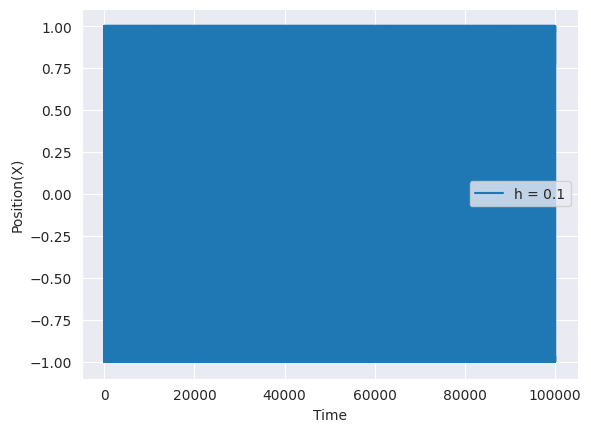

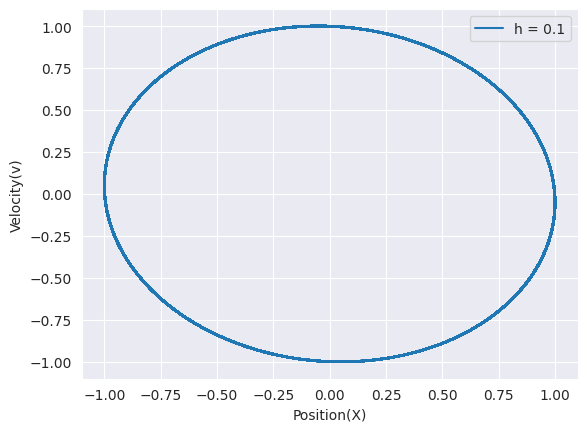

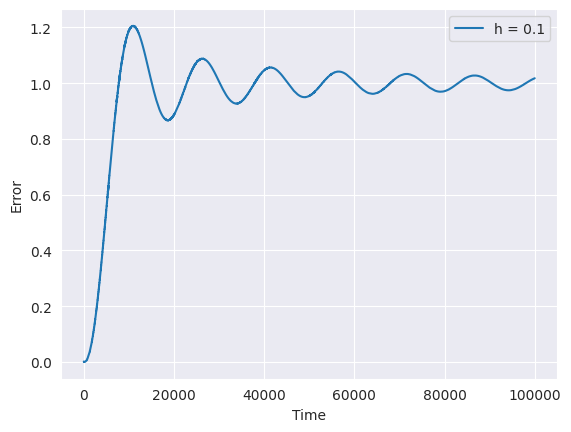

In [5]:
Euler(Dt=[0.1], t = 100000)

**2.Euler-Cromer Method**

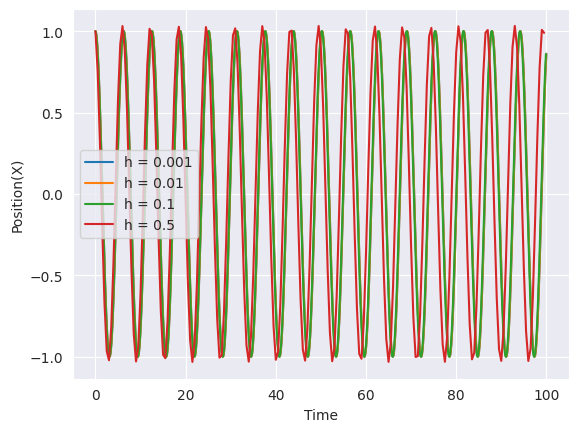

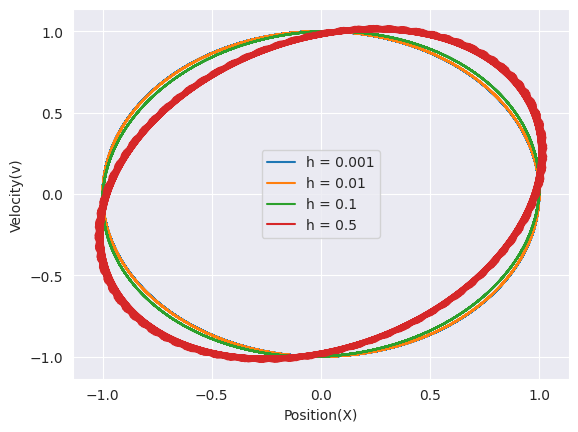

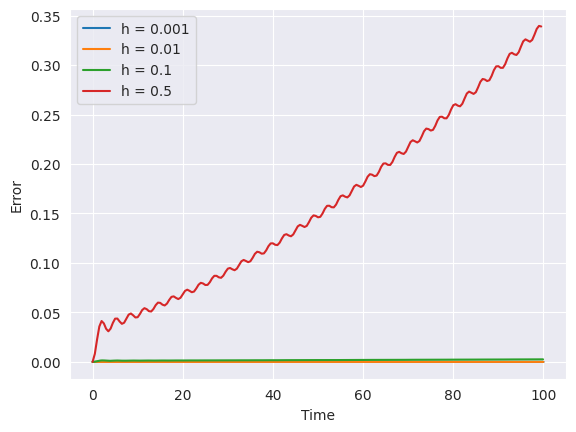

In [6]:
def Euler_Cromer(w=1,x0=1,v0=0,Dt=[1e-3, 1e-2, 1e-1,0.5],t=100):
  for dt in Dt:
    steps = round(t/dt)
    v = [v0]
    x = [x0]
    A = x0
    B = v0 / w
    Real_value = np.zeros(steps)
    Real_value[0] = x0
    for i in range(1,steps):
      v.append(v[-1] -w**2 * x[-1] * dt )
      x.append(x[-1] + v[-1] * dt)
      Real_value[i] = A * np.cos(w * i * dt) + B * np.sin(w * i* dt)

    plt.figure(1)
    plt.plot(np.arange(len(x)) * dt, x, label=f'h = {dt}')
    plt.xlabel('Time')
    plt.ylabel('Position(X)')
    plt.legend()


    plt.figure(2)
    plt.plot(v,x, label=f'h = {dt}')
    plt.xlabel('Position(X)')
    plt.ylabel('Velocity(v)')
    plt.legend()

    x = np.array(x)
    error = np.cumsum((x - Real_value)**2)
    I = np.arange(1, len(error) + 1)
    error /= I

    plt.figure(3)
    plt.plot(np.arange(len(x)) * dt, error, label=f'h = {dt}')
    plt.xlabel('Time')
    plt.ylabel('Error')
    plt.legend()


  plt.show()

  plt.show()

  plt.show()

Euler_Cromer()

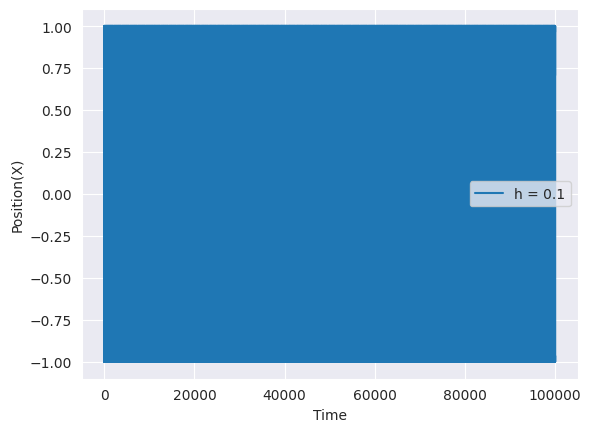

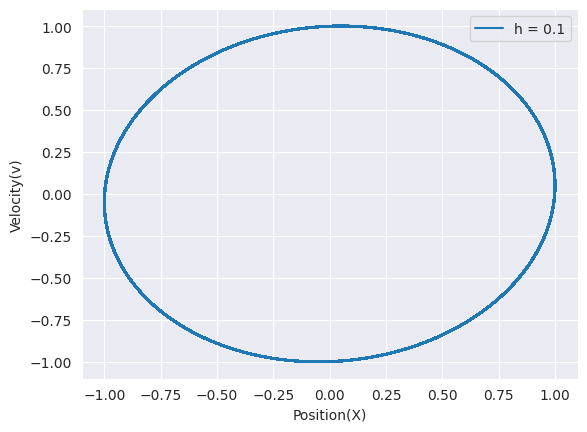

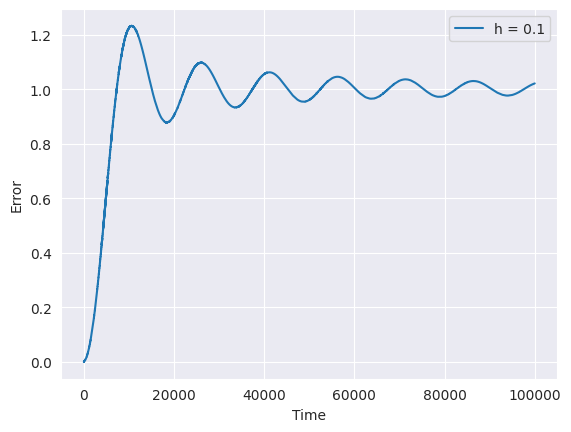

In [7]:
Euler_Cromer(Dt=[0.1], t = 100000)

**3.Frog Leap Method**

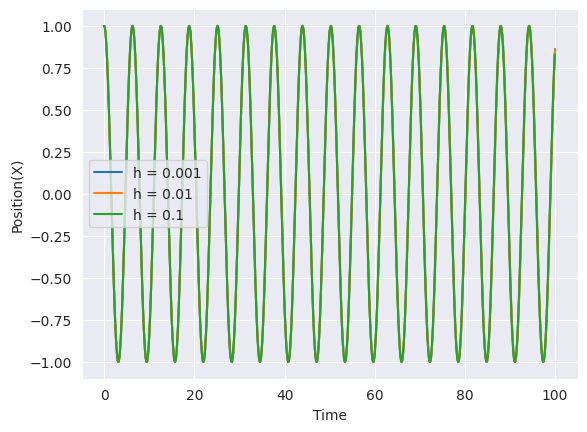

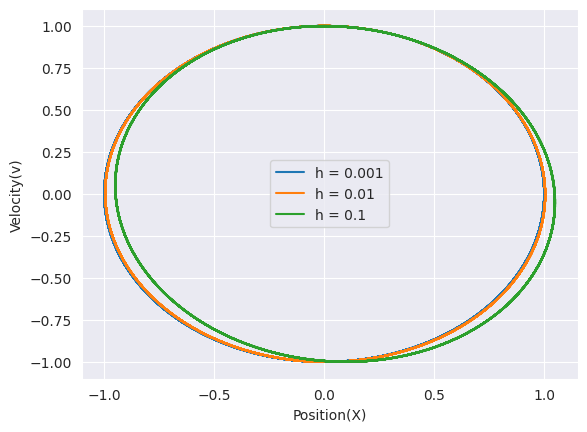

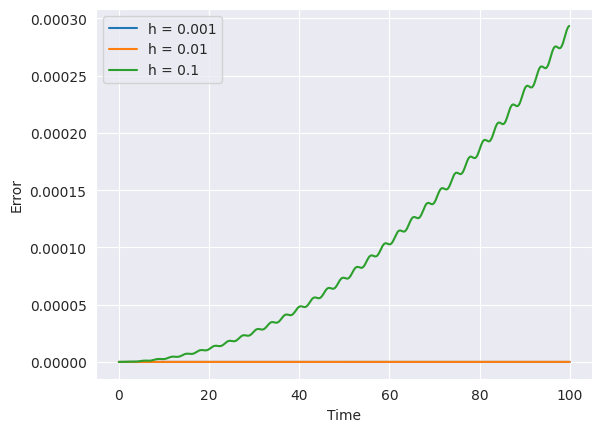

In [8]:
def Leap_Frog(w=1,x0=1,v0=0,Dt=[1e-3, 1e-2, 1e-1],t=100):
  for dt in Dt:
    steps = round(t/dt)
    vhalf = v0 - w ** 2 * x0 * dt/2
    v = [v0]
    x = [x0]
    A = x0
    B = v0 / w
    Real_value = np.zeros(steps)
    Real_value[0] = x0
    for i in range(1,steps):
      x.append(x[-1] + vhalf * dt)
      v.append(v[-1] - w**2 * x[-1] * dt)
      Real_value[i] = A * np.cos(w * i * dt) + B * np.sin(w * i* dt)
      vhalf -= w ** 2 *x[-1] * dt
    plt.figure(1)
    plt.plot(np.arange(len(x)) * dt, x, label=f'h = {dt}')
    plt.xlabel('Time')
    plt.ylabel('Position(X)')
    plt.legend()


    plt.figure(2)
    plt.plot(v,x, label=f'h = {dt}')
    plt.xlabel('Position(X)')
    plt.ylabel('Velocity(v)')
    plt.legend()

    x = np.array(x)
    error = np.cumsum((x - Real_value)**2)
    I = np.arange(1, len(error) + 1)
    error /= I

    plt.figure(3)
    plt.plot(np.arange(len(x)) * dt, error, label=f'h = {dt}')
    plt.xlabel('Time')
    plt.ylabel('Error')
    plt.legend()


  plt.show()

  plt.show()

  plt.show()

Leap_Frog()

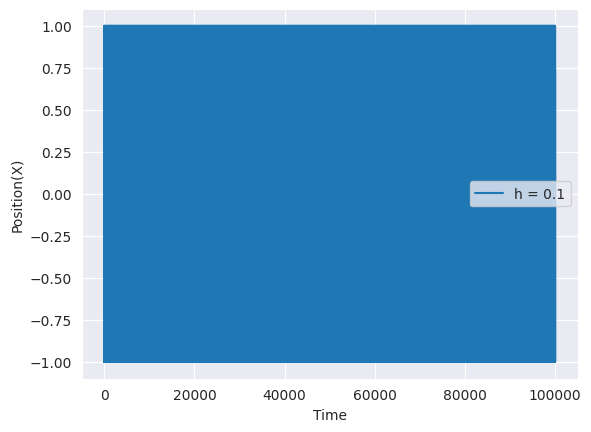

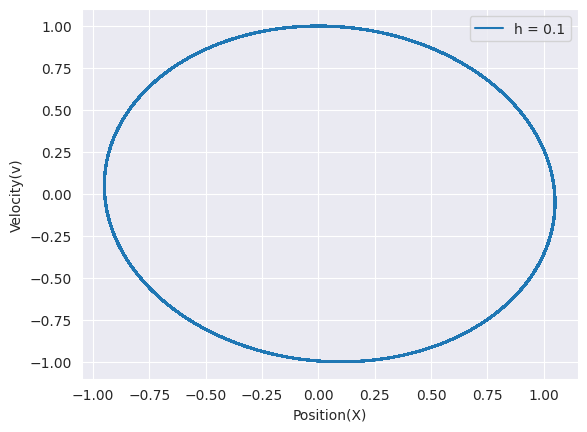

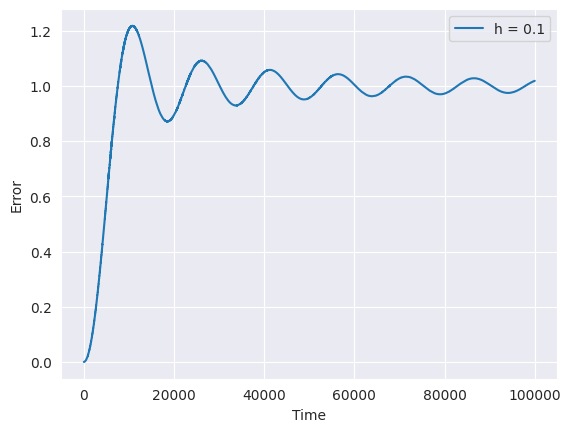

In [9]:
Leap_Frog(Dt=[0.1], t = 100000)

**4.verlet Method**

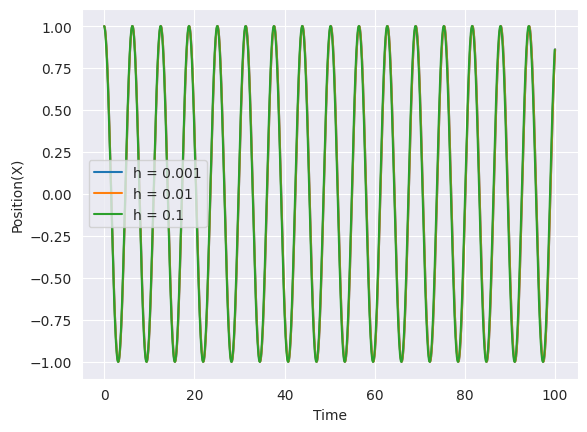

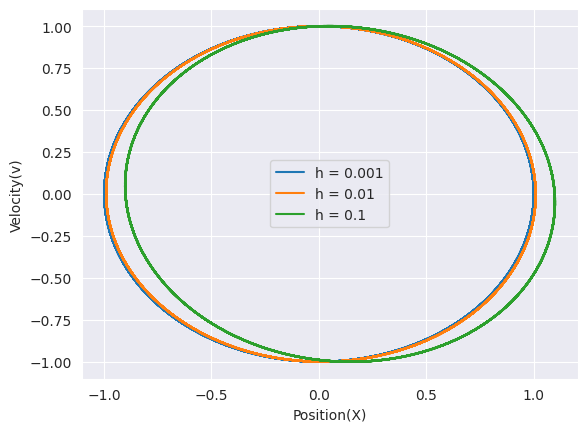

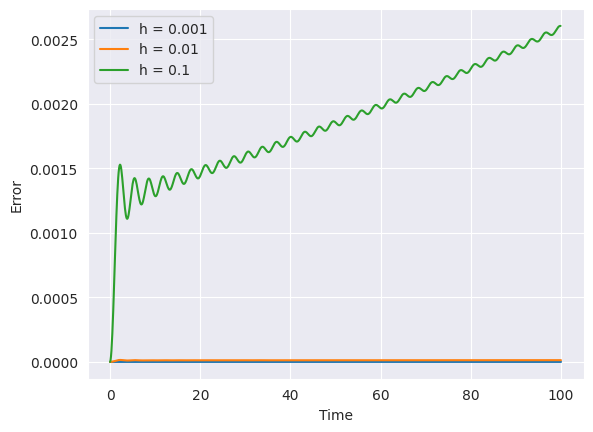

In [10]:
def verlet(w=1,x0=1,v0=0,Dt=[1e-3, 1e-2, 1e-1],t=100):
  for dt in Dt:
    steps = round(t/dt)
    v1 = v0 - w ** 2 * x0 * dt
    x1 = x0 - w **2 * x0 * dt ** 2
    v = [v0, v1]
    x = [x0, x1]
    A = x0
    B = v0 / w
    Real_value = np.zeros(steps)
    Real_value[0:2] = [x0, A * np.cos(w * dt) + B * np.sin(w * dt)]
    for i in range(2,steps):
      x.append(2 * x[-1] - x[-2] - w **2 * x[-1] * dt **2)
      v.append(v[-1] - w**2 * x[-1] * dt)
      Real_value[i] = A * np.cos(w * i * dt) + B * np.sin(w * i* dt)

    plt.figure(1)
    plt.plot(np.arange(len(x)) * dt, x, label=f'h = {dt}')
    plt.xlabel('Time')
    plt.ylabel('Position(X)')
    plt.legend()


    plt.figure(2)
    plt.plot(v,x, label=f'h = {dt}')
    plt.xlabel('Position(X)')
    plt.ylabel('Velocity(v)')
    plt.legend()

    x = np.array(x)
    error = np.cumsum((x - Real_value)**2)
    I = np.arange(1, len(error) + 1)
    error /= I

    plt.figure(3)
    plt.plot(np.arange(len(x)) * dt, error, label=f'h = {dt}')
    plt.xlabel('Time')
    plt.ylabel('Error')
    plt.legend()


  plt.show()

  plt.show()

  plt.show()

verlet()

In [ ]:
verlet(Dt=[0.1], t = 100000)

**5.velocity Verlet**

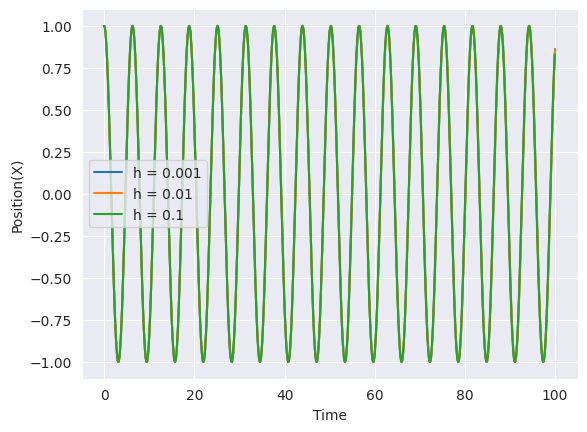

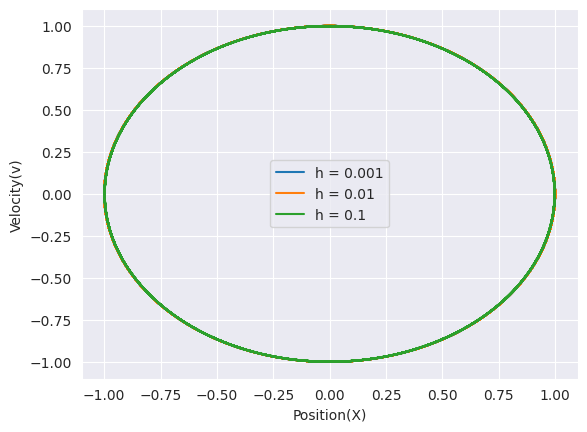

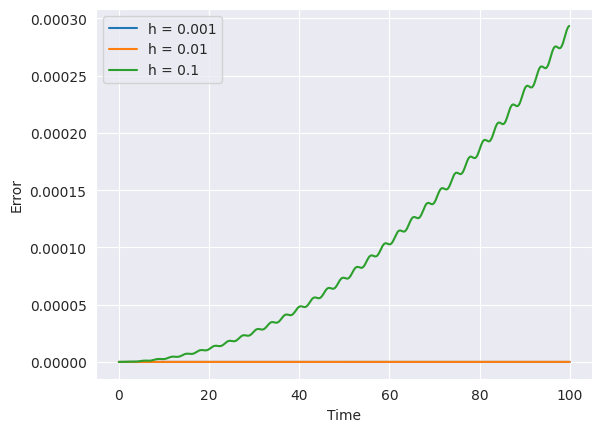

In [52]:
def velocity_verlet(w=1,x0=1,v0=0,Dt=[1e-3, 1e-2, 1e-1],t=100):
  for dt in Dt:
    steps = round(t/dt)
    v = [v0]
    x = [x0]
    a = [- w **2 * x0]
    A = x0
    B = v0 / w
    Real_value = np.zeros(steps)
    Real_value[0] = x0
    for i in range(1,steps):
      x.append(x[-1] + v[-1] * dt + 0.5 * a[-1] * dt**2)
      a.append(-w **2 * x[-1])
      v.append(v[-1] + 0.5 * (a[-1] + a[-2]) * dt)
      Real_value[i] = A * np.cos(w * i * dt) + B * np.sin(w * i* dt)

    plt.figure(1)
    plt.plot(np.arange(len(x)) * dt, x, label=f'h = {dt}')
    plt.xlabel('Time')
    plt.ylabel('Position(X)')
    plt.legend()


    plt.figure(2)
    plt.plot(v,x, label=f'h = {dt}')
    plt.xlabel('Position(X)')
    plt.ylabel('Velocity(v)')
    plt.legend()

    x = np.array(x)
    error = np.cumsum((x - Real_value)**2)
    I = np.arange(1, len(error) + 1)
    error /= I

    plt.figure(3)
    plt.plot(np.arange(len(x)) * dt, error, label=f'h = {dt}')
    plt.xlabel('Time')
    plt.ylabel('Error')
    plt.legend()


  plt.show()

  plt.show()

  plt.show()

velocity_verlet()

In [ ]:
velocity_verlet(Dt=[0.1], t = 100000)

**6.Beeman Method**

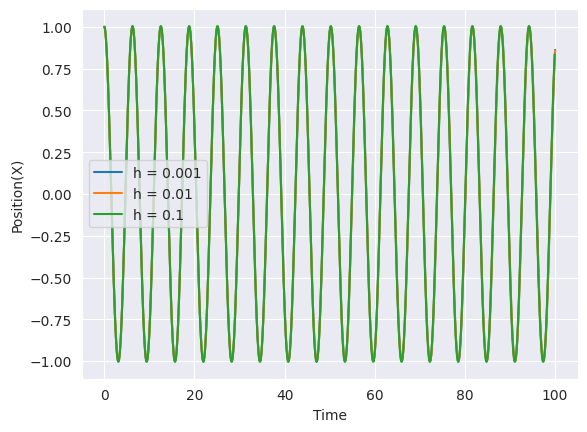

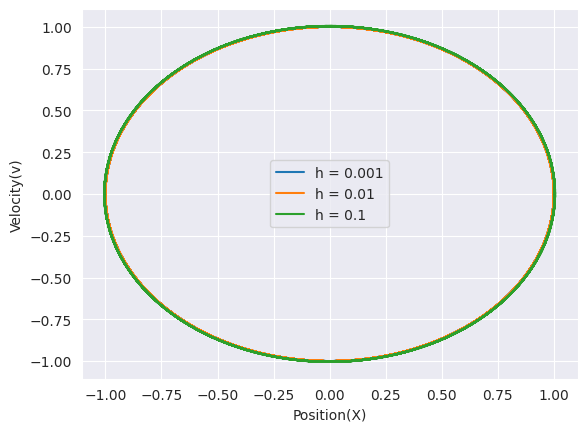

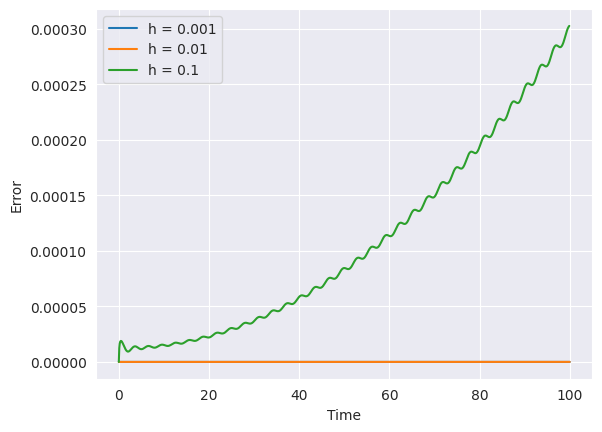

In [53]:
def beeman(w=1,x0=1,v0=0,Dt=[1e-3, 1e-2, 1e-1],t=100):
  for dt in Dt:
    steps = round(t/dt)
    x1 = x0 + v0 * dt
    v1 = v0 - w**2 * x0 *dt
    v = [v0, v1]
    x = [x0, x1]
    a = [- w **2 * x0, -w**2 * x1]
    A = x0
    B = v0 / w
    Real_value = np.zeros(steps)
    Real_value[0:2] = [x0, A * np.cos(w * dt) + B *np.sin(w * dt)]
    for i in range(2,steps):
      x.append(x[-1] + v[-1] * dt + 2/3 * a[-1] * dt**2  - 1/6 * a[-2] * dt ** 2)
      a.append(-w **2 * x[-1])
      v.append(v[-1] + 1/3 * a[-1] * dt + 5/6 * a[-2] * dt - 1/6 * a[-3] * dt)
      Real_value[i] = A * np.cos(w * i * dt) + B * np.sin(w * i* dt)

    plt.figure(1)
    plt.plot(np.arange(len(x)) * dt, x, label=f'h = {dt}')
    plt.xlabel('Time')
    plt.ylabel('Position(X)')
    plt.legend()


    plt.figure(2)
    plt.plot(v,x, label=f'h = {dt}')
    plt.xlabel('Position(X)')
    plt.ylabel('Velocity(v)')
    plt.legend()

    x = np.array(x)
    error = np.cumsum((x - Real_value)**2)
    I = np.arange(1, len(error) + 1)
    error /= I

    plt.figure(3)
    plt.plot(np.arange(len(x)) * dt, error, label=f'h = {dt}')
    plt.xlabel('Time')
    plt.ylabel('Error')
    plt.legend()


  plt.show()

  plt.show()

  plt.show()

beeman()

In [ ]:
beeman(Dt=[0.1], t = 100000)

# **3.Chaos**

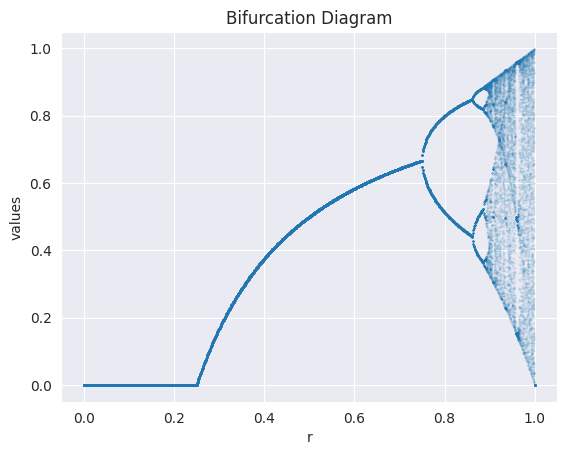

Bifurcation constant is: 4.6114067750431


In [40]:
def logistic_map(x0=0.5, R=np.linspace(0.00001,1,1000), n=50000):
  bifur = np.zeros((len(R) * 100, 2))
  j = 1
  a = np.array([0.0,0.0,0.0])
  c = 1
  bifur_const= []
  for r in R:
    x = [x0]
    for i in range(n):
      x.append(4 * r * x[-1] * (1 - x[-1]))
    m = len(np.unique(np.round(x[-100:], 6)))
    if m != c:
      c = m
      a = np.roll(a,1)
      a[0] = r

      if np.all(a != 0):
        bifur_const.append((a[1] - a[2]) / (a[0] - a[1]))

    bifur[(j - 1) * 100: j *100, 0] = r
    bifur[(j - 1) * 100: j *100, 1] = x[-100:]
    j+=1
  plt.scatter(bifur[:,0], bifur[:,1], s=0.1, alpha=0.2)
  plt.title(f'Bifurcation Diagram')
  plt.xlabel('r')
  plt.ylabel('values')
  plt.show()

  print(f'Bifurcation constant is: {np.mean(bifur_const)}')

logistic_map()